In [1]:
%matplotlib inline
import os
import sys
from glob import glob

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
sys.version

'2.7.15 (default, Oct 15 2018, 15:24:06) \n[GCC 8.1.1 20180712 (Red Hat 8.1.1-5)]'

In [3]:
sys.path.append(os.path.expanduser('~/Work/Projects/sextractorxx/SEImplementation/python'))
sys.path.append(os.path.expanduser('~/Work/Projects/sextractorxx/build.x86_64-fc28-gcc82-dbg/lib'))

In [4]:
import libSEMain
from sextractorxx.config import *

In [5]:
config_file = os.path.expanduser('~/Work/Data/sim08/test_py_small.config')

# Configuration

In [6]:
images = sorted(glob(os.path.expanduser('~/Work/Data/sim08/sim08_r_01.fits')))
psfs = sorted(glob(os.path.expanduser('~/Work/Data/sim08/sim08_r_01.psf')))

top = load_fits_images(images, psfs)
top.split(ByKeyword('FILTER'))

measurement_group = MeasurementGroup(top)

for band, group in top:
    all_ap = []
    for img in group:
        if band == 'i':
            all_ap.extend(add_aperture_photometry(img, [5, 20]))
        elif band == 'r':
            all_ap.extend(add_aperture_photometry(img, [40, 50, 60]))
    add_output_column('aperture_{}'.format(band), all_ap)

In [7]:
print_output_columns()

Aperture outputs:
    aperture_r : [(ID:1, apertures:[40,50,60])]


## Run SExtractor++

In [8]:
# No additional plugins
%time catalog = libSEMain.run(config_file, '', [])

CPU times: user 28.3 s, sys: 35.3 ms, total: 28.3 s
Wall time: 20.2 s


In [9]:
type(catalog)

numpy.ndarray

In [10]:
from astropy.table import Table

In [11]:
t = Table(catalog)

In [12]:
t

"aperture_r_flux [1,3]","aperture_r_flux_err [1,3]","aperture_r_mag [1,3]","aperture_r_mag_err [1,3]","aperture_r_flags [1,3]",world_centroid_alpha,world_centroid_delta,pixel_centroid_x,pixel_centroid_y,source_id,detection_id
float32,float32,float32,float32,int64,float64,float64,float64,float64,int32,int32
164090.88 .. 159042.86,1684.8718 .. 2508.38,12.962289 .. 12.996214,0.01114788 .. 0.01712336,8 .. 8,29.987062454223633,19.972152709960938,1136.5216064453125,1.9195806980133057,1,1
158733.19 .. 158807.38,1681.8751 .. 2505.3916,12.99833 .. 12.997824,0.0115036545 .. 0.01712832,8 .. 8,29.98773193359375,19.972118377685547,1148.1724853515625,1.8046913743019104,2,2
-1250.1357 .. -2673.9163,1679.0887 .. 2502.6055,99.0 .. 99.0,-1.458231 .. -1.016142,8 .. 8,29.97096061706543,19.972789764404297,855.4992065429688,1.6994795203208923,3,3
2783.4094 .. 3511.495,1788.6669 .. 2614.2258,17.388557 .. 17.136269,0.69768953 .. 0.8082782,8 .. 8,29.964435577392578,19.973285675048828,742.1070556640625,6.118223667144775,4,6
158512.86 .. 171635.95,1963.6261 .. 2799.399,12.999838 .. 12.91348,0.013449438 .. 0.017707871,8 .. 8,29.9877872467041,19.972759246826172,1150.4415283203125,13.963947296142578,5,8
3661394.8 .. 3662221.0,1792.0961 .. 2617.7444,9.590884 .. 9.590639,0.0005314037 .. 0.00077605504,12 .. 12,30.001768112182617,19.971786499023438,1393.59033203125,6.259821891784668,6,9
160835.31 .. 160504.75,1986.1766 .. 2824.024,12.984047 .. 12.98628,0.013407454 .. 0.019102504,8 .. 8,29.98572540283203,19.972900390625,1114.5650634765625,15.066336631774902,7,10
77440.48 .. 80266.58,1949.2726 .. 2783.803,13.77758 .. 13.738663,0.027328411 .. 0.037654214,8 .. 8,29.93532371520996,19.97483253479004,234.8402862548828,13.276220321655273,8,12
4868.737 .. 2707.253,2123.6248 .. 2980.634,16.78146 .. 17.418678,0.47355598 .. 1.195335,8 .. 8,29.943187713623047,19.97500228881836,373.0409240722656,22.442638397216797,9,14


## Check output

In [13]:
from astropy.io import fits

In [14]:
img = fits.open(os.path.expanduser('~/Work/Data/sim08/sim08_r_01.fits'))[0].data

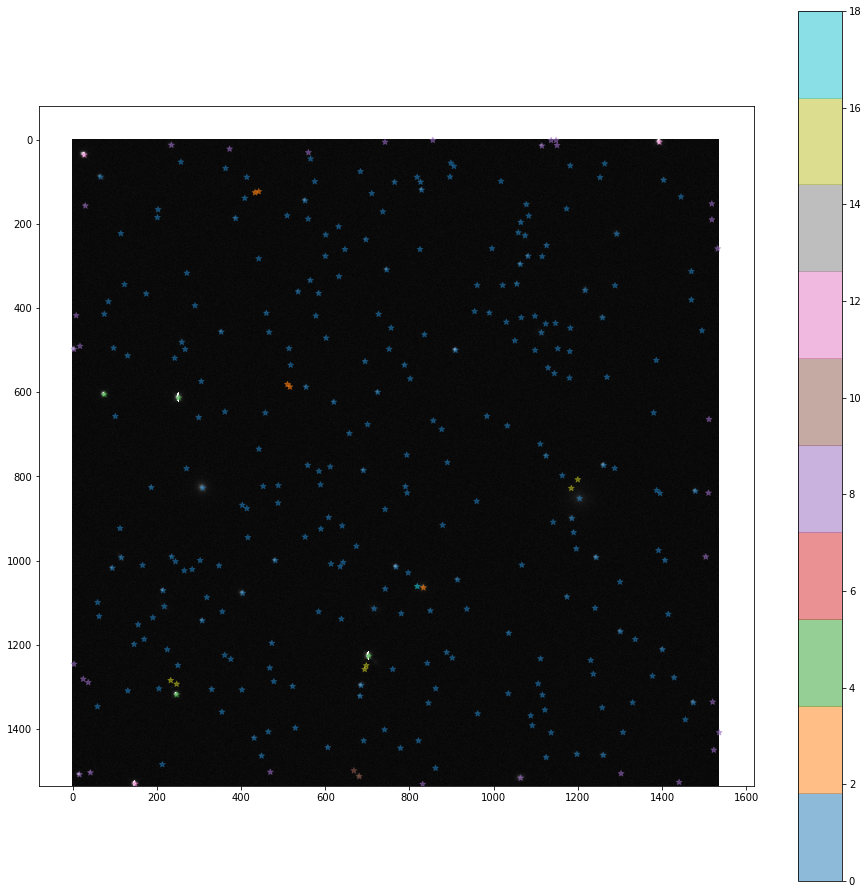

In [15]:
plt.figure(figsize=(16,16))
plt.imshow(img, cmap=plt.get_cmap('gray'), norm=colors.SymLogNorm(20))
plt.scatter(t['pixel_centroid_x'], t['pixel_centroid_y'], marker='*', alpha=0.5, c=t['aperture_r_flags'][:,:,0].reshape(len(t)), cmap=plt.get_cmap('tab10'))
plt.colorbar()

In [16]:
r_mags = t['aperture_r_mag'][:,:,2].reshape(len(t))
r_mags = r_mags[r_mags < 99.] # Filter out errors

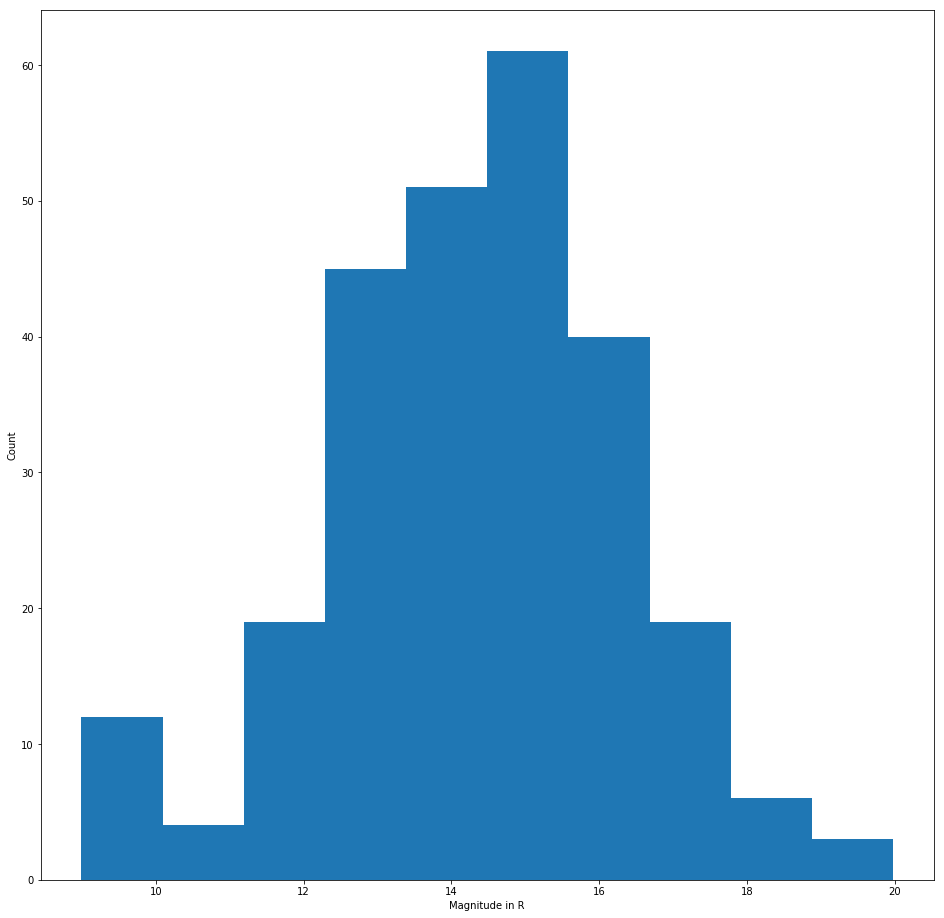

In [17]:
plt.figure(figsize=(16,16))
plt.hist(r_mags)
plt.xlabel('Magnitude in R')
_ = plt.ylabel('Count')